# Data Wrangling

## Load Data & Package

In [3]:
# Library
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla
import streamlit as st
import time
from scipy import stats
import sys
import io
from babel.numbers import format_currency
import matplotlib.dates as mdates
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [19]:
# Data day
day_df = pd.read_csv("https://raw.githubusercontent.com/Zen-Rofiqy/Bangkit-2024/main/04%20Analisis%20Data%20dng%20Py/%40Proyek-akhir/Bike-sharing-dataset/day.csv")
day_df.head(n=10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
# Data Hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/Zen-Rofiqy/Bangkit-2024/main/04%20Analisis%20Data%20dng%20Py/%40Proyek-akhir/Bike-sharing-dataset/hour.csv")
hour_df.head(n=10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Metadata
> Latarbelakang

**_Bike sharing_** atau Sistem berbagi sepeda adalah generasi baru dari **penyewaan sepeda tradisional** di mana seluruh proses mulai dari **keanggotaan**, **penyewaan**, dan **pengembalian** sepeda menjadi **otomatis**. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat **lebih dari 500 program** berbagi sepeda di seluruh dunia yang terdiri dari **lebih dari 500k sepeda**. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan. 

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, **karakteristik data** yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, **durasi perjalanan**, **posisi keberangkatan** dan **kedatangan secara eksplisit** dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi **jaringan sensor virtual** yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

> Data set

Proses penyewaan sepeda bersama sangat **berkorelasi** dengan **kondisi lingkungan** dan **musim**. Misalnya, **kondisi cuaca**, **curah hujan**, **hari dalam seminggu**, **musim**, **jam dalam sehari**, dan lain-lain dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis selama **dua tahun** yang berkaitan dengan tahun **2011** dan **2012** dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat yang tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data tersebut dalam dua basis data **per jam** dan **per hari**, kemudian mengekstrak dan menambahkan **informasi cuaca** dan **musim** yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

> Tugas terkait
* **Regresi**: 
	**Prediksi jumlah penyewaan sepeda** per jam atau per hari **berdasarkan pengaturan lingkungan dan musim**.
	
* **Deteksi Peristiwa dan Anomali**:  
	**Jumlah sepeda yang disewa** juga **berkorelasi** dengan beberapa **peristiwa di kota** yang dapat dengan mudah ditelusuri melalui mesin pencari.	Sebagai contoh, kueri seperti "2012-10-30 washington d.c." di Google mengembalikan hasil yang terkait dengan **Badai Sandy**. Beberapa peristiwa penting diidentifikasi dalam [1]. Oleh karena itu, data tersebut dapat digunakan untuk **validasi algoritma** **pendeteksi anomali atau kejadian**.

> Karakteristik Dataset

Baik hour.csv dan day.csv memiliki bidang berikut, kecuali hr yang tidak tersedia di day.csv
	
* `instant`    : indeks catatan
* `dteday`     : tanggal
* `season`     : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
* `yr`         : tahun (0: 2011, 1: 2012)
* `mnth`       : bulan (1 hingga 12)
* `hr`         : jam (0 hingga 23)
* `holiday`    : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
* `weekday`    : hari dalam seminggu
* `workingday` : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
* `weathersit` : 
	- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
	- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
	- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
	- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut
* `temp`       : Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
* `atemp`      : Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
* `hum`        : Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
* `windspeed`  : Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
* `casual`     : jumlah pengguna biasa
* `registered` : jumlah pengguna terdaftar
* `cnt`        : jumlah total sepeda yang disewa termasuk yang kasual dan terdaftar


## Assessing Data

### Menilai Data `day_df`

Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df`. Proses ini dapat dilakukan menggunakan method `info()` seperti contoh kode berikut.

In [465]:
dw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Juga tidak ada perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan tidak adanya missing values pada semua kolom atau peubah.

#### Mengecek Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memang terbukti bahwa tidak ada missing value pada data`day_df`.

#### Mengecek statistik deksriptif

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memang akan sedikit sulit untuk menilai data dari statistik deskriptif nya. Agak lebih mudah dalam menilainya, akan dilakukan visualisasi data untuk eksplorasi data.

### Menilai Data `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti `day_df`, jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Juga tidak ada perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan tidak adanya missing values pada semua kolom atau peubah. 

Maka dari kedua data yang ada, tidak perlu dilakukan proses *cleaning data*. Hanya saja mungkin jika ingin mengubah kode seperti 0, 1, 2.. mungkin bisa diubah agar bisa lebih terlihat dengan jelas. Lalu juga seperti peubah `windspeed`, `hum` yang telah dinormalisasi, mungkin bisa dikembalikan agar mudah mengidentifikasikannya.

 ### Ubah kode

In [443]:
data = pd.DataFrame(day_df)

data['season'] = data['season'].replace({1: 'M Semi', 2: 'M Panas', 3:"M Gugur", 4:"M Dingin"})
data['yr'] = data['yr'].replace({0: '2011', 1: '2012'})
data['mnth']= data['mnth'].astype('category')
data['holiday'] = data['holiday'].replace({0: '-', 1: 'Libur'})
data['workingday'] = data['workingday'].replace({0: 'WeekDay', 1: 'WeekEnd'})
data['weekday'] = data['weekday'].replace({0: 'Senin', 1: 'Selasa', 2:'Rabu', 3:'Kamis', 4:"Jum'at", 5:"Sabtu", 6:"Minggu"})
data['weathersit'] = data['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3:'Salju Ringan', 4:'Hujan Lebat'})
data['windspeed'] = data['windspeed']*67
data['hum'] = data['hum']*100
data['temp'] = data['temp']*41
data['season']= data['season'].astype('category')
data['yr']= data['yr'].astype('category')
data['weekday']= data['weekday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data['dteday'] = pd.to_datetime(data['dteday'])
data.head(n=10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,14.110847,0.363625,80.5833,10.749882,331,654,985
1,2,2011-01-02,M Semi,2011,1,-,Senin,WeekDay,Berkabut,14.902598,0.353739,69.6087,16.652113,131,670,801
2,3,2011-01-03,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,8.050924,0.189405,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,-,Rabu,WeekEnd,Cerah,8.200000,0.212122,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,-,Kamis,WeekEnd,Cerah,9.305237,0.229270,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,M Semi,2011,1,-,Jum'at,WeekEnd,Cerah,8.378268,0.233209,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,M Semi,2011,1,-,Sabtu,WeekEnd,Berkabut,8.057402,0.208839,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,6.765000,0.162254,53.5833,17.875868,68,891,959
8,9,2011-01-09,M Semi,2011,1,-,Senin,WeekDay,Cerah,5.671653,0.116175,43.4167,24.250650,54,768,822
9,10,2011-01-10,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,6.184153,0.150888,48.2917,14.958889,41,1280,1321


In [87]:
dw_df = pd.DataFrame(day_df)

dw_df['season'] = dw_df['season'].replace({1: 'M Semi', 2: 'M Panas', 3:"M Gugur", 4:"M Dingin"})
dw_df['yr'] = dw_df['yr'].replace({0: '2011', 1: '2012'})
dw_df['mnth']= dw_df['mnth'].astype('category')
dw_df['holiday'] = dw_df['holiday'].replace({0: '-', 1: 'Libur'}).astype('category')
dw_df['workingday'] = dw_df['workingday'].replace({0: 'WeekEnd', 1: 'WeekDay'}).astype('category')
dw_df['workingday']= dw_df['workingday'].astype('category')
dw_df['weekday'] = dw_df['weekday'].replace({0: 'Senin', 1: 'Selasa', 2:'Rabu', 3:'Kamis', 4:"Jum'at", 5:"Sabtu", 6:"Minggu"})
dw_df['weathersit'] = dw_df['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3:'Salju Ringan', 4:'Hujan Lebat'})
dw_df['season']= dw_df['season'].astype('category')
dw_df['yr']= dw_df['yr'].astype('category')
dw_df['weekday']= dw_df['weekday'].astype('category')
dw_df['weathersit'] = dw_df['weathersit'].astype('category')

dw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


In [6]:
dw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,M Semi,2011,1,-,Senin,WeekDay,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,-,Rabu,WeekEnd,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,-,Kamis,WeekEnd,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Eksplorasi Data

### Pivot by season

In [7]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa banyaknya hari didominasi pada musim gugur (musim 3), namun perbedaan antar musimnya tidak terlalu jauh. Di lain sisi, distribusi jumlah total sepeda yang diswewa (`cnt`) ternyata cukup beragam pada batas bawah atau nilai minimalnya. Sedangkan pada batas atas atau nilai maximalnya cenderung mirip.

In [16]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

Berbeda dengan `day_df` distribusi jumlah total sepeda yang diswewa (`cnt`) ternyata cukup mirip yakni berkisar 1 hingga 970 sepeda, kecuali pada musim semi (musim 1).

### Sebaran Data

#### Musim

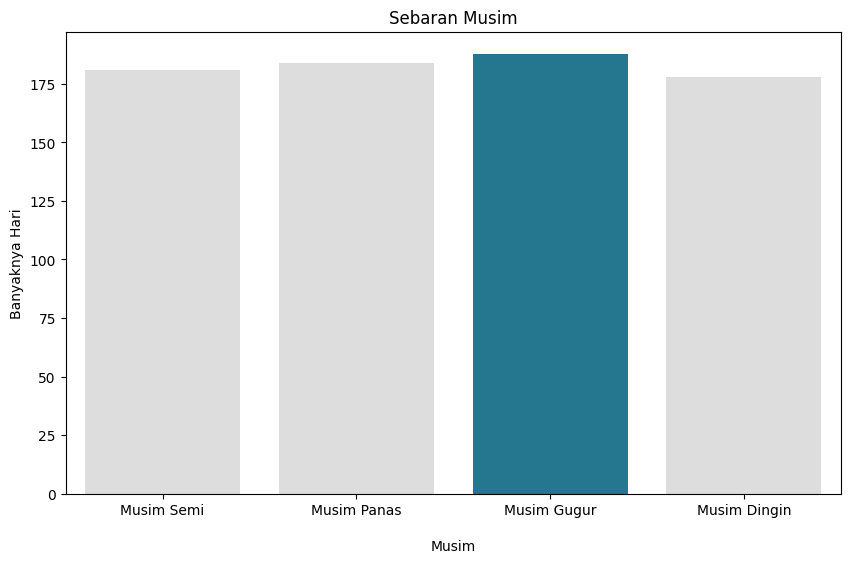

In [8]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['season'].value_counts().idxmax()
categories = day_df['season'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

season_names = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Musim')
plt.xlabel('\nMusim')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=season_names)

plt.show()

#### Hari libur

C:\Users\Fathan\AppData\Local\Temp\ipykernel_170796\3473231616.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



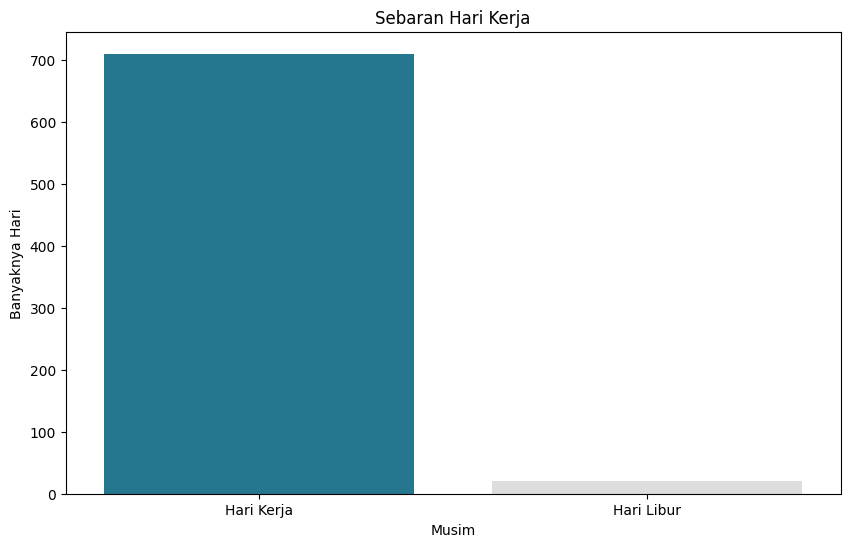

In [100]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['holiday'].value_counts().idxmax()
categories = day_df['holiday'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

names = ['Hari Kerja', 'Hari Libur']

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='holiday', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Hari Kerja')
plt.xlabel('\nHari libur')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=names)

plt.show()

#### Cuaca

C:\Users\Fathan\AppData\Local\Temp\ipykernel_170796\1815743998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



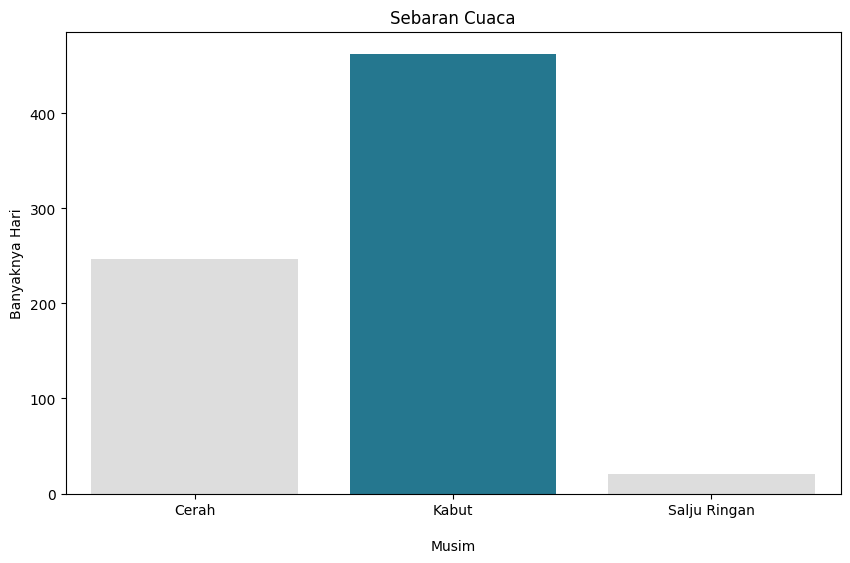

In [104]:
# Mendapatkan musim dengan jumlah data terbanyak
max_season = day_df['weathersit'].value_counts().idxmax()
categories = day_df['weathersit'].unique()
cols = ['#1380A1' if (x == max_season) else '#dddddd' for x in categories]

names = ['Cerah', 'Berkabut', 'Salju Ringan'] #Gak ada hujan lebat dalam data

# Membuat countplot untuk musim
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=day_df, order=categories, palette=cols)
plt.title('Sebaran Cuaca')
plt.xlabel('\nCuaca')
plt.ylabel('Banyaknya Hari')

# Mengatur label pada sumbu x
plt.xticks(ticks=range(len(categories)), labels=names)

plt.show()

In [103]:
#cek apakah benar tidak ada hujan lebat dalam data
pd.Series(day_df['weathersit']).value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

#### Temperatur

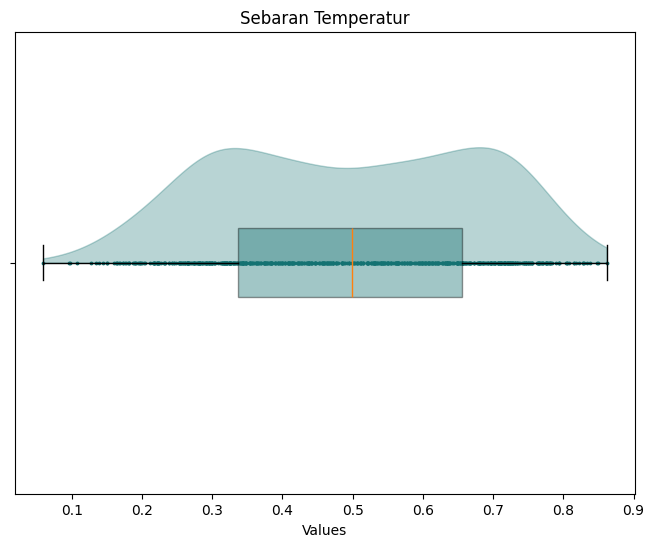

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#147272']

# Boxplot data
bp = ax.boxplot(day_df['temp'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#147272']

# Violinplot data
vp = ax.violinplot(day_df['temp'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#147272']

# Scatterplot data
plt.scatter(day_df['temp'], np.ones(len(day_df['temp'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Temperatur")
plt.show()

#### Suhu perasaan

Suhu/temperatur lingkungan yang dirasakan oleh orang. 

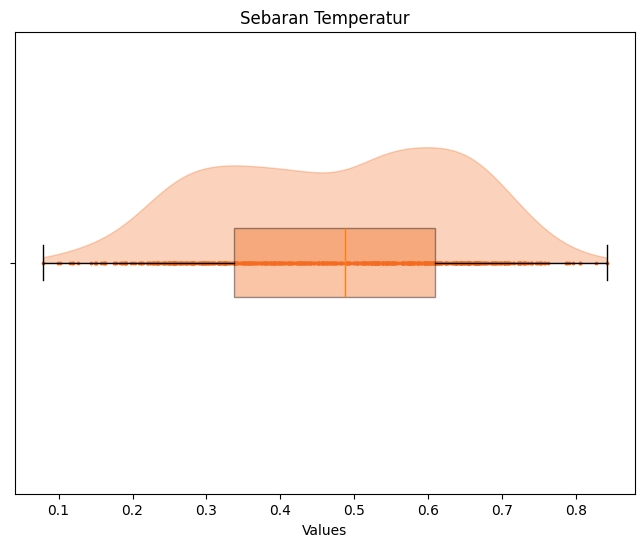

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#F36C21']

# Boxplot data
bp = ax.boxplot(day_df['atemp'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#F36C21']

# Violinplot data
vp = ax.violinplot(day_df['atemp'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#F36C21']

# Scatterplot data
plt.scatter(day_df['atemp'], np.ones(len(day_df['atemp'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Suhu Perasaan")
plt.show()

#### Kelembapan

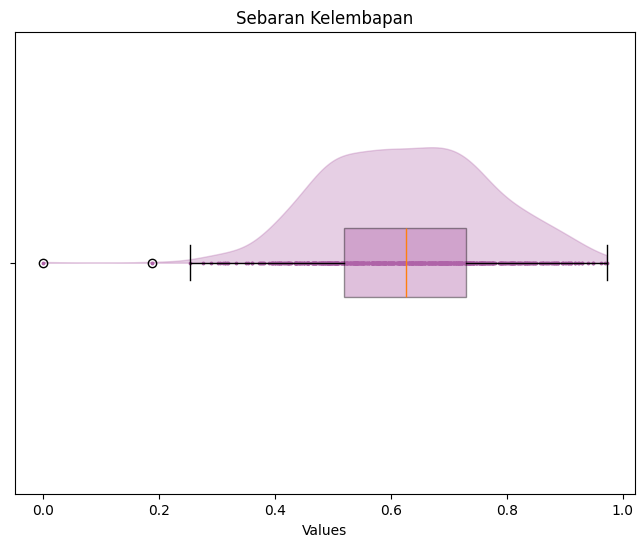

In [145]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#AF63A8']

# Boxplot data
bp = ax.boxplot(day_df['hum'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#AF63A8']

# Violinplot data
vp = ax.violinplot(day_df['hum'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#AF63A8']

# Scatterplot data
plt.scatter(day_df['hum'], np.ones(len(day_df['hum'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Kelembapan")
plt.show()

#### Kecepatan Angin

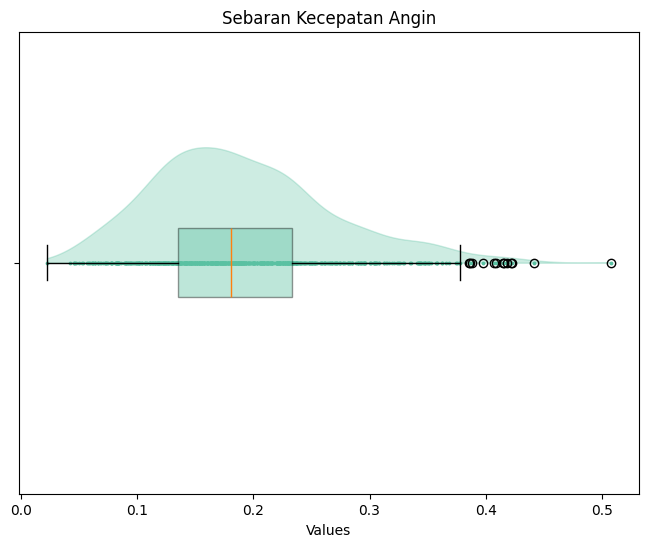

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#5AC1A2']

# Boxplot data
bp = ax.boxplot(day_df['windspeed'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#5AC1A2']

# Violinplot data
vp = ax.violinplot(day_df['windspeed'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#5AC1A2']

# Scatterplot data
plt.scatter(day_df['windspeed'], np.ones(len(day_df['windspeed'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Kecepatan Angin")
plt.show()

#### Jumlah Pengguna Biasa

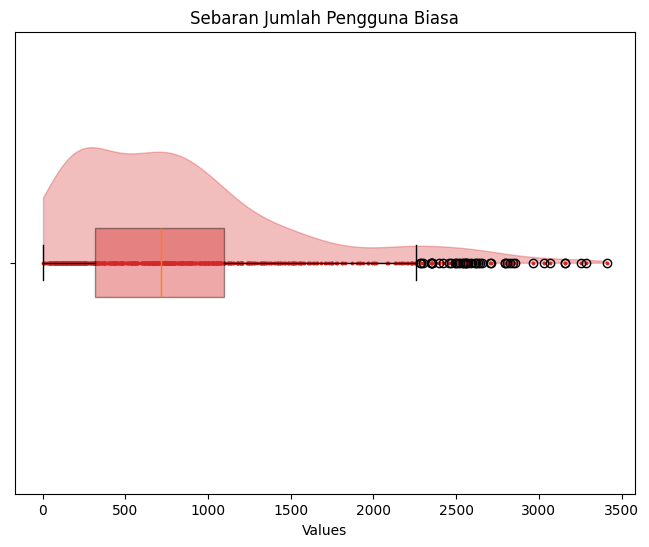

In [147]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#D52727']

# Boxplot data
bp = ax.boxplot(day_df['casual'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#D52727']

# Violinplot data
vp = ax.violinplot(day_df['casual'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#D52727']

# Scatterplot data
plt.scatter(day_df['casual'], np.ones(len(day_df['casual'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah Pengguna Biasa")
plt.show()

#### Jumlah pengguna terdaftar

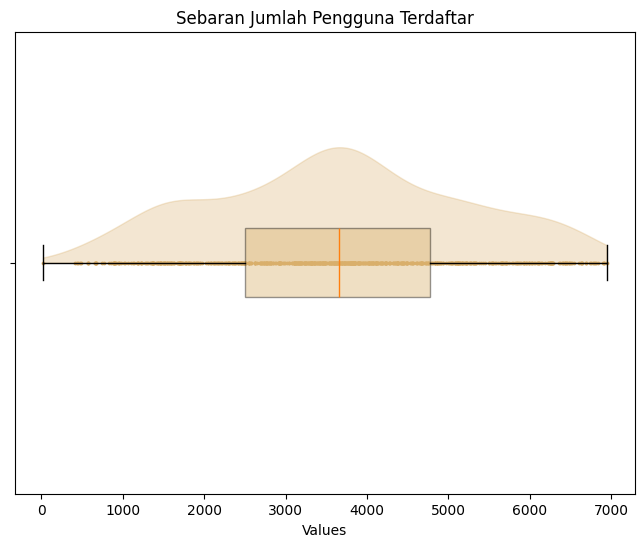

In [148]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#D9AF6B']

# Boxplot data
bp = ax.boxplot(day_df['registered'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#D9AF6B']

# Violinplot data
vp = ax.violinplot(day_df['registered'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#D9AF6B']

# Scatterplot data
plt.scatter(day_df['registered'], np.ones(len(day_df['registered'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah Pengguna Terdaftar")
plt.show()

#### Jumlah Total sepeda yang disewa (kasual dan terdafar)

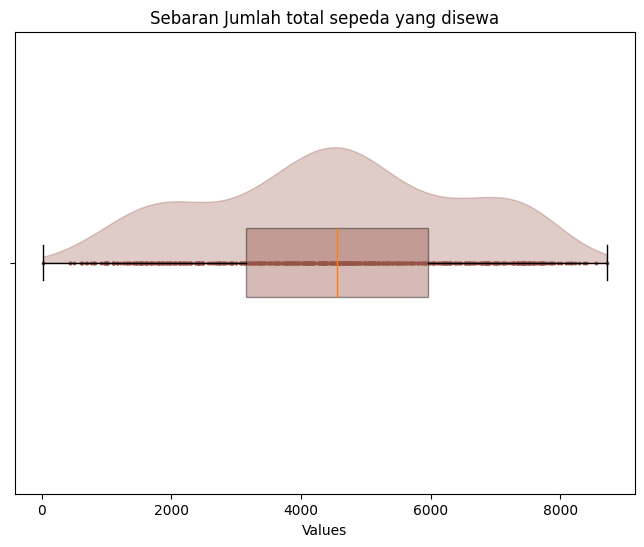

In [149]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['#975348']

# Boxplot data
bp = ax.boxplot(day_df['cnt'], patch_artist=True, vert=False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#975348']

# Violinplot data
vp = ax.violinplot(day_df['cnt'], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#975348']

# Scatterplot data
plt.scatter(day_df['cnt'], np.ones(len(day_df['cnt'])), s=3, c=scatter_colors[0])

plt.yticks([1], [''])  # Set text labels.
plt.xlabel('Values')
plt.title("Sebaran Jumlah total sepeda yang disewa")
plt.show()

### Sebaran ver2

In [11]:
def plot_disk(data_frame, column, names=None):
    # Mendapatkan kategori unik dan warna untuk plot
    max_value = data_frame[column].value_counts().idxmax()
    categories = data_frame[column].unique()
    colors = ['#1380A1' if x == max_value else '#dddddd' for x in categories]

    # Mendapatkan nama kategori
    category_names = [str(cat) for cat in categories]
    if names:
        category_names = names

    # Membuat countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data_frame, order=categories, palette=colors)
    plt.title(f'Sebaran {column}')
    plt.xlabel(f'\n{column}')
    plt.ylabel('Banyaknya Hari')

    # Mengatur label pada sumbu x
    plt.xticks(ticks=range(len(categories)), labels=category_names)

    # Menyimpan plot dalam variabel
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Menutup plot untuk plot selanjutnya
    plt.close()

    return buffer

# Menyimpan plot 
# Disktrit
c_season = plot_disk(day_df, 'season', names=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
c_holiday = plot_disk(day_df, 'holiday', names=['Hari Kerja', 'Hari Libur'])
c_weathersit = plot_disk(day_df, 'weathersit', names=['Cerah', 'Berkabut', 'Salju Ringan'])


In [13]:
display(Image(c_holiday.getvalue()))

TypeError: 'module' object is not callable

In [195]:
def plot_kon(data_frame, column):
    # Membuat subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['#5AC1A2']

    # Boxplot data
    bp = ax.boxplot(data_frame[column], patch_artist=True, vert=False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['#5AC1A2']

    # Violinplot data
    vp = ax.violinplot(data_frame[column], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])

    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['#5AC1A2']

    # Scatterplot data
    plt.scatter(data_frame[column], np.ones(len(data_frame[column])), s=3, c=scatter_colors[0])

    plt.yticks([1], [''])  # Set text labels.
    plt.xlabel('Values')
    plt.title(f"Sebaran {column}")

    # Menyimpan plot dalam variabel
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Menutup plot untuk plot selanjutnya
    plt.close()

    return buffer


# Kontinu
c_temp = plot_kon(day_df, 'temp')
c_atemp = plot_kon(day_df, 'atemp')
c_hum = plot_kon(day_df, 'hum')
c_windspeed = plot_kon(day_df, 'windspeed')
c_casual = plot_kon(day_df, 'casual')
c_registered = plot_kon(day_df, 'registered')
c_cnt = plot_kon(day_df, 'cnt')

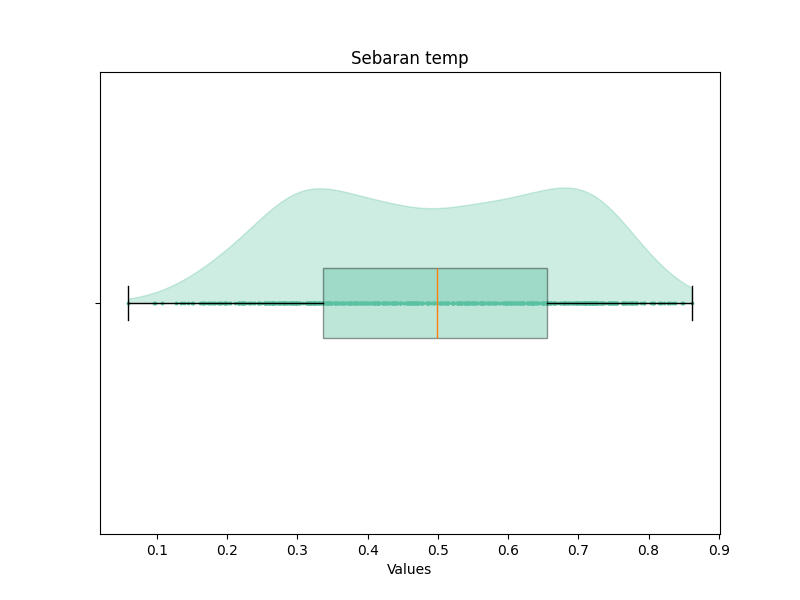

In [196]:
display(Image(c_temp.getvalue()))

### Pie Chart

In [103]:
# Menghitung jumlah hari libur & weekend
holiday_weekend_count = dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekEnd')].shape[0] + dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekEnd')].shape[0]

# Menghitung jumlah hari kerja/weekday
weekday_count = dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekDay')].shape[0] + dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekDay')].shape[0]

# Menampilkan informasi frekuensi
print(f"Banyaknya hari libur & weekend: {holiday_weekend_count}")
print(f"Banyaknya hari kerja/weekday: {weekday_count}")


Banyaknya hari libur & weekend: 231
Banyaknya hari kerja/weekday: 500


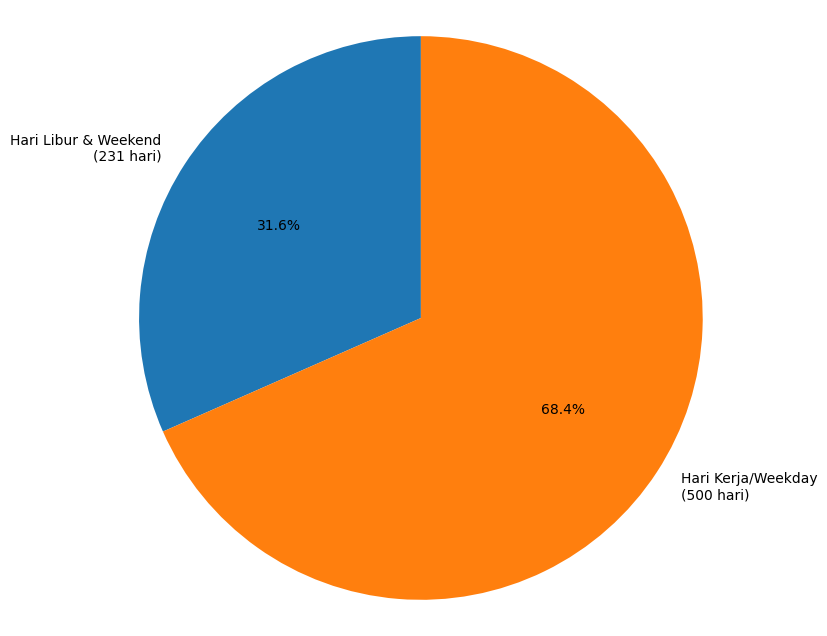

In [108]:
# Menghitung jumlah hari libur & weekend
holiday_weekend_count = dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekEnd')].shape[0] + dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekEnd')].shape[0]

# Menghitung jumlah hari kerja/weekday
weekday_count = dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekDay')].shape[0] + dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekDay')].shape[0]

# Membuat Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting untuk hari libur & weekend dan hari kerja/weekday
labels = ['Hari Libur & Weekend', 'Hari Kerja/Weekday']
sizes = [holiday_weekend_count, weekday_count]
colors = ['#1f77b4', '#ff7f0e']

# Menampilkan pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan frekuensi di sebelah label
for i, label in enumerate(labels):
    texts[i].set_text(label + f'\n({sizes[i]} hari)')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\Fathan\AppData\Local\Temp\ipykernel_188684\2370224922.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



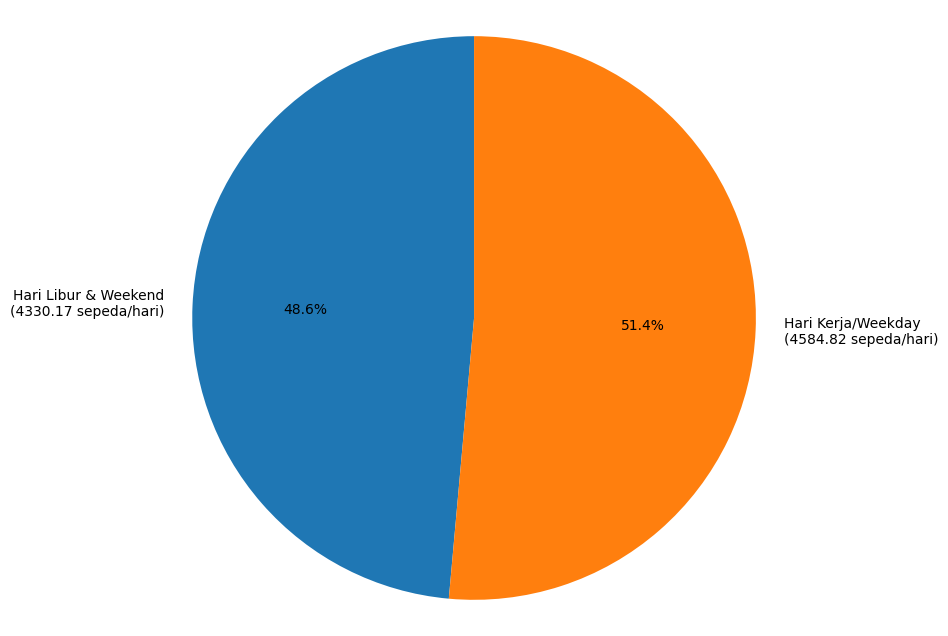

In [109]:
# Dummy grouped_data (digunakan untuk demo)
grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()

# Menghitung jumlah hari libur & weekend
holiday_weekend_count = dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekEnd')].shape[0] + dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekEnd')].shape[0]

# Menghitung jumlah hari kerja/weekday
weekday_count = dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekDay')].shape[0] + dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekDay')].shape[0]

# Menghitung total penyewaan sepeda pada hari libur/weekend dan hari kerja/weekday
holiday_weekend = grouped_data.loc[('Libur', 'WeekEnd')] + grouped_data.loc[('-', 'WeekEnd')]
weekday_weekend = grouped_data.loc[('-', 'WeekDay')] + grouped_data.loc[('Libur', 'WeekDay')]

# Menampilkan informasi frekuensi
st.write(f"Banyaknya hari libur & weekend: {holiday_weekend_count}")
st.write(f"Banyaknya hari kerja/weekday: {weekday_count}")

# Membuat Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting untuk hari libur/weekend dan hari kerja/weekday
labels = ['Hari Libur & Weekend', 'Hari Kerja/Weekday']
sizes = [holiday_weekend / holiday_weekend_count, weekday_weekend / weekday_count]
colors = ['#1f77b4', '#ff7f0e']

# Menampilkan pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan frekuensi di sebelah label
for i, label in enumerate(labels):
    texts[i].set_text(label + f'\n({sizes[i]:.2f} sepeda/hari)')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\Fathan\AppData\Local\Temp\ipykernel_188684\1415877826.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



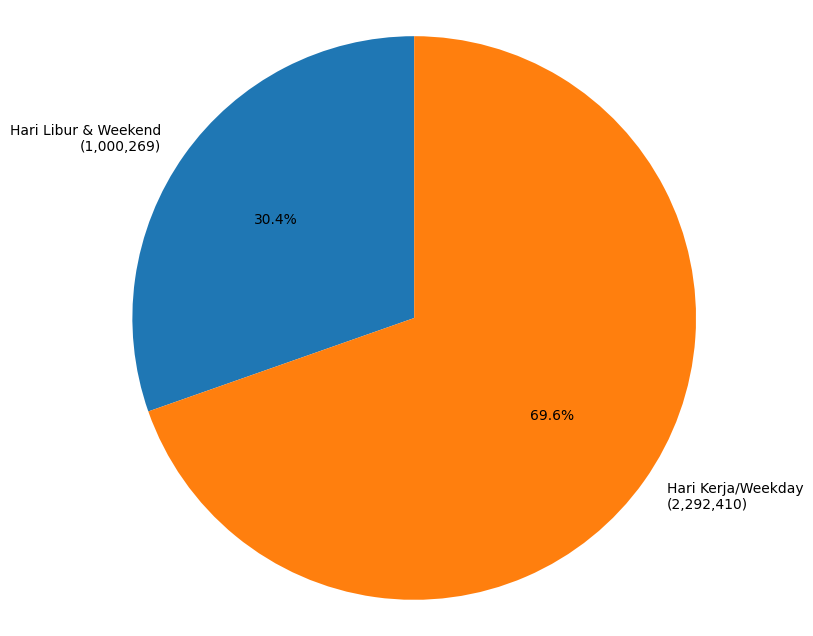

In [89]:
# Dummy grouped_data (digunakan untuk demo)
grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()

# Menghitung total penyewaan sepeda pada hari libur/weekend dan hari kerja/weekday
holiday_weekend = grouped_data.loc[('Libur', 'WeekEnd')] + grouped_data.loc[('-', 'WeekEnd')]
weekday_weekend = grouped_data.loc[('-', 'WeekDay')] + grouped_data.loc[('Libur', 'WeekDay')]

# Menampilkan informasi frekuensi
st.write(f"Jumlah penyewaan sepeda pada Hari Libur & Weekend: {holiday_weekend}")
st.write(f"Jumlah penyewaan sepeda pada Hari Kerja/Weekday: {weekday_weekend}")

# Membuat Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting untuk hari libur/weekend dan hari kerja/weekday
labels = ['Hari Libur & Weekend', 'Hari Kerja/Weekday']
sizes = [holiday_weekend, weekday_weekend]
colors = ['#1f77b4', '#ff7f0e']

# Menampilkan pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan frekuensi di sebelah label
for i, label in enumerate(labels):
    texts[i].set_text(label + f'\n({sizes[i]:,})')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [91]:
69.6-30.4

39.199999999999996

C:\Users\Fathan\AppData\Local\Temp\ipykernel_188684\1997247604.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



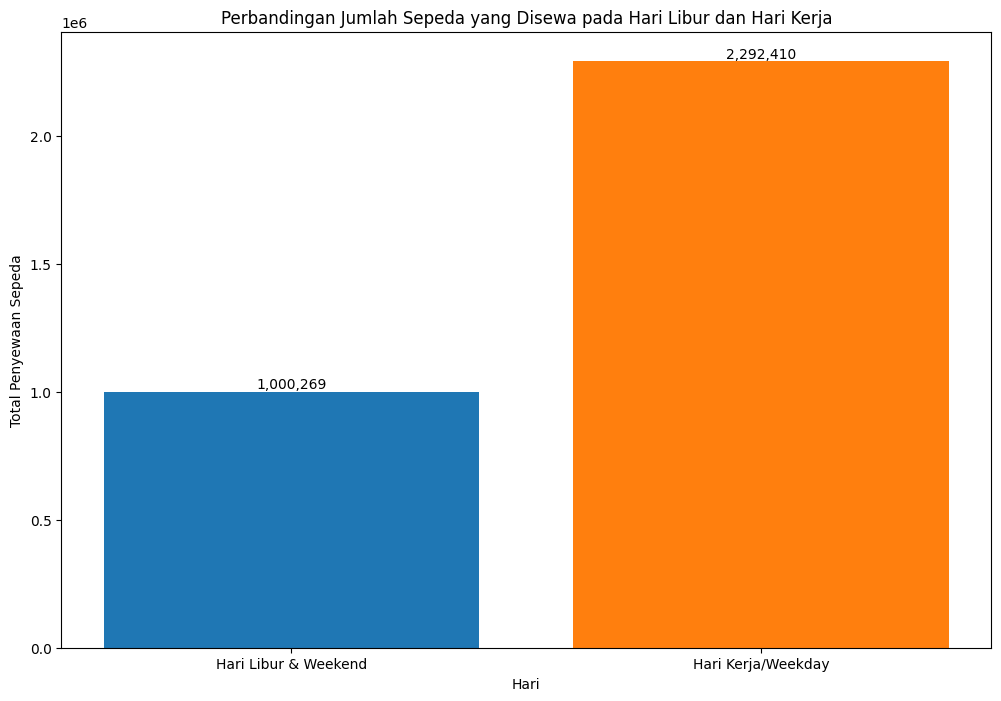

In [88]:
# Menghitung total penyewaan sepeda pada hari libur/weekend dan hari kerja/weekday
grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()

# Memilih data untuk hari libur/weekend dan hari kerja/weekday
holiday_weekend = grouped_data.loc[('Libur', 'WeekEnd')] + grouped_data.loc[('-', 'WeekEnd')]
weekday_weekend = grouped_data.loc[('-', 'WeekDay')] + grouped_data.loc[('Libur', 'WeekDay')]

# Membuat Bar Chart
plt.figure(figsize=(12, 8))

# Plotting untuk hari libur/weekend dan hari kerja/weekday
bars = plt.bar(['Hari Libur & Weekend', 'Hari Kerja/Weekday'], [holiday_weekend, weekday_weekend], color=['#1f77b4', '#ff7f0e'])

plt.title('Perbandingan Jumlah Sepeda yang Disewa pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Sepeda')

# Menambahkan jumlah penyewaan di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "{:,}".format(int(yval)), ha='center', va='bottom', fontsize=10)


plt.grid(linewidth=0)
plt.show()

In [69]:
# Menghitung total penyewaan sepeda pada hari libur/weekend dan hari kerja/weekday
grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()
print(grouped_data, "\n\n")

# Memisahkan data menjadi hari libur/weekend dan hari kerja/weekday
holiday_data = grouped_data.loc[(slice(None), 'WeekEnd'), :]
weekday_data = grouped_data.loc[(slice(None), 'WeekDay'), :] 
print(holiday_data, "\n\n")
print(weekday_data, "\n\n")

holiday  workingday
-        WeekDay        921834
         WeekEnd       2292410
Libur    WeekDay         78435
         WeekEnd             0
Name: cnt, dtype: int64 




C:\Users\Fathan\AppData\Local\Temp\ipykernel_188684\887837920.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



IndexingError: Too many indexers

### Time Series

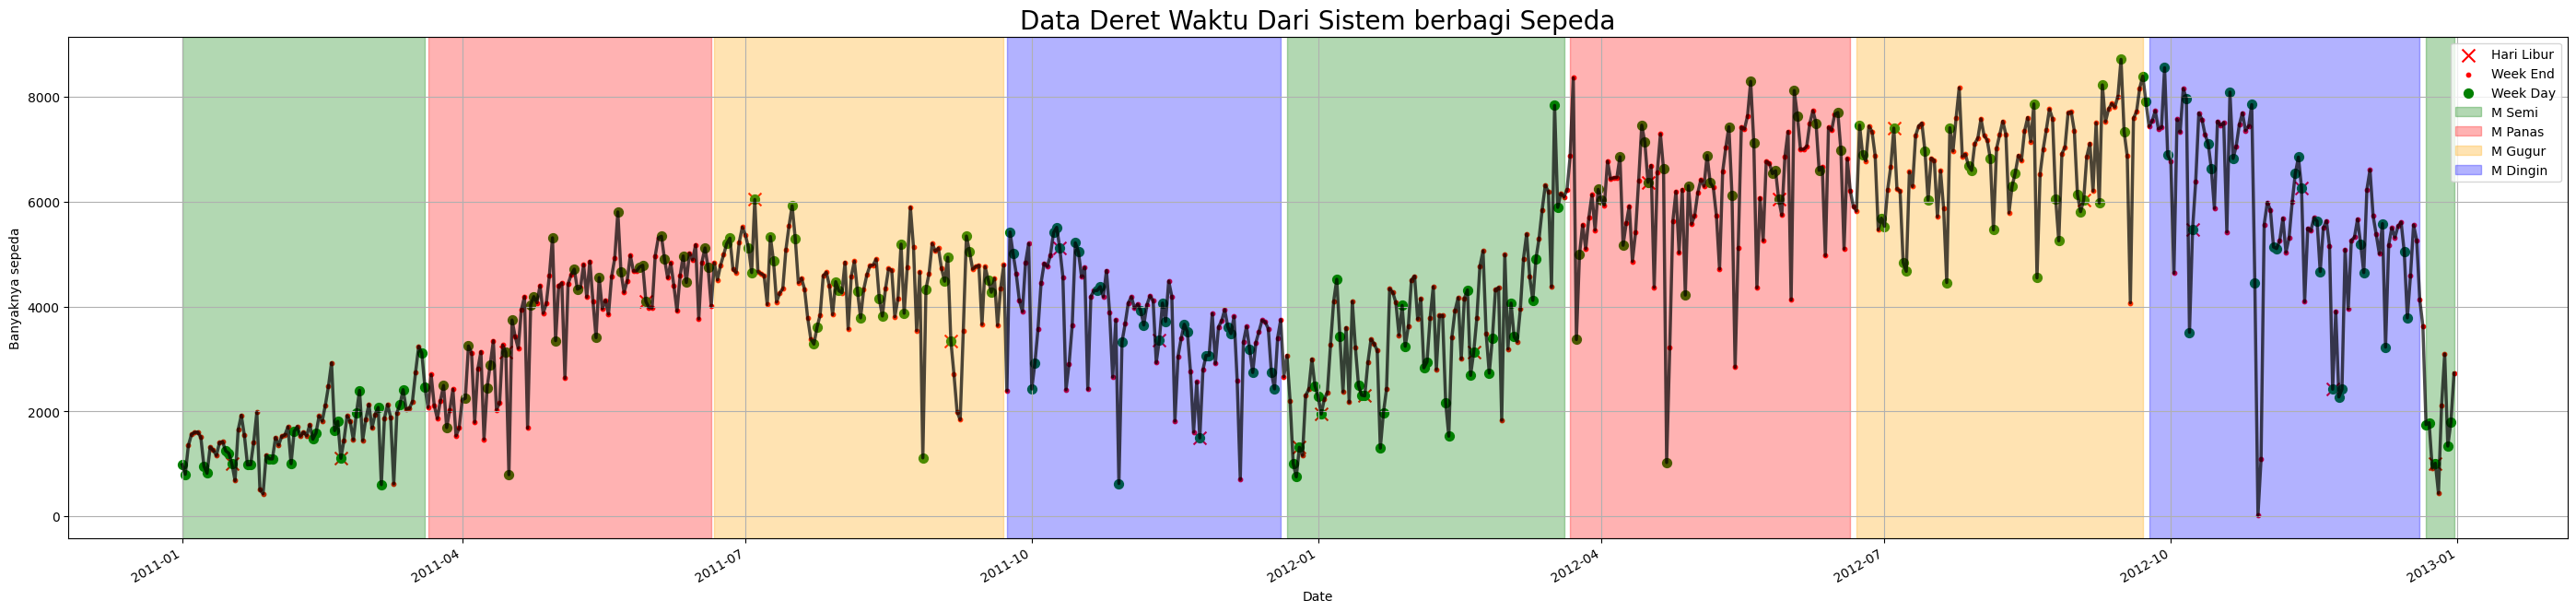

In [21]:
# Konversi kolom 'dteday' menjadi tipe data datetime
dw_df['dteday'] = day_df['dteday']
dw_df['dteday'] = pd.to_datetime(dw_df['dteday'])

# Plot the time series
plt.figure(figsize=(35, 8))
plt.plot(dw_df['dteday'], dw_df['cnt'], linestyle='-', color='black', alpha=0.7, linewidth=2.5)
plt.scatter(dw_df[dw_df['holiday'] != '-']['dteday'], dw_df[dw_df['holiday'] != '-']['cnt'], marker='x', color='red', label='Hari Libur', s=100)
plt.scatter(dw_df[dw_df['workingday'] != 'WeekDay']['dteday'], dw_df[dw_df['workingday'] != 'WeekDay']['cnt'], marker='o', color='red', label='Week End', s=10)
plt.scatter(dw_df[dw_df['workingday'] != 'WeekEnd']['dteday'], dw_df[dw_df['workingday'] != 'WeekEnd']['cnt'], marker='o', color='green', label='Week Day', s=50)
plt.title('Data Deret Waktu Dari Sistem berbagi Sepeda', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Banyaknya sepeda')
plt.grid(True)

# Menyesuaikan format tanggal pada sumbu x
plt.gcf().autofmt_xdate()

# Warna untuk setiap musim
colors = ['green', 'red', 'orange', 'blue']

# Daftar untuk menyimpan legenda unik
unique_legends = []

# Highlight each season's time range
for season, color in zip(dw_df['season'].unique(), colors):
    season_data = dw_df[dw_df['season'] == season]
    sorted_dates = season_data['dteday'].sort_values()
    
    start_range = None
    first_iteration = True
    for i in range(len(sorted_dates)):
        current_date = sorted_dates.iloc[i]
        if start_range is None:
            start_range = current_date
        elif (current_date - sorted_dates.iloc[i - 1]).days > 1 or i == len(sorted_dates) - 1:
            end_range = sorted_dates.iloc[i - 1] if i != len(sorted_dates) - 1 else current_date
            
            # Tambahkan legenda unik jika belum ada
            if season not in unique_legends:
                unique_legends.append(season)
                plt.axvspan(start_range, end_range, color=color, alpha=0.3, label=season)
            else:
                plt.axvspan(start_range, end_range, color=color, alpha=0.3)
            
            start_range = None
            first_iteration = False

# Menambahkan legenda
plt.legend()

plt.show()

In [22]:
dw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,M Semi,2011,1,-,Senin,WeekDay,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,-,Rabu,WeekEnd,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,-,Kamis,WeekEnd,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
print(dw_df['holiday'].value_counts())
print(dw_df['workingday'].value_counts())

holiday
-        710
Libur     21
Name: count, dtype: int64
workingday
WeekEnd    500
WeekDay    231
Name: count, dtype: int64


In [24]:
dw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,M Semi,2011,1,-,Senin,WeekDay,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,-,Rabu,WeekEnd,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,-,Kamis,WeekEnd,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Matriks Korelasi

Ref :

*  https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another
![alt text](https://i.stack.imgur.com/cmk1J.png)

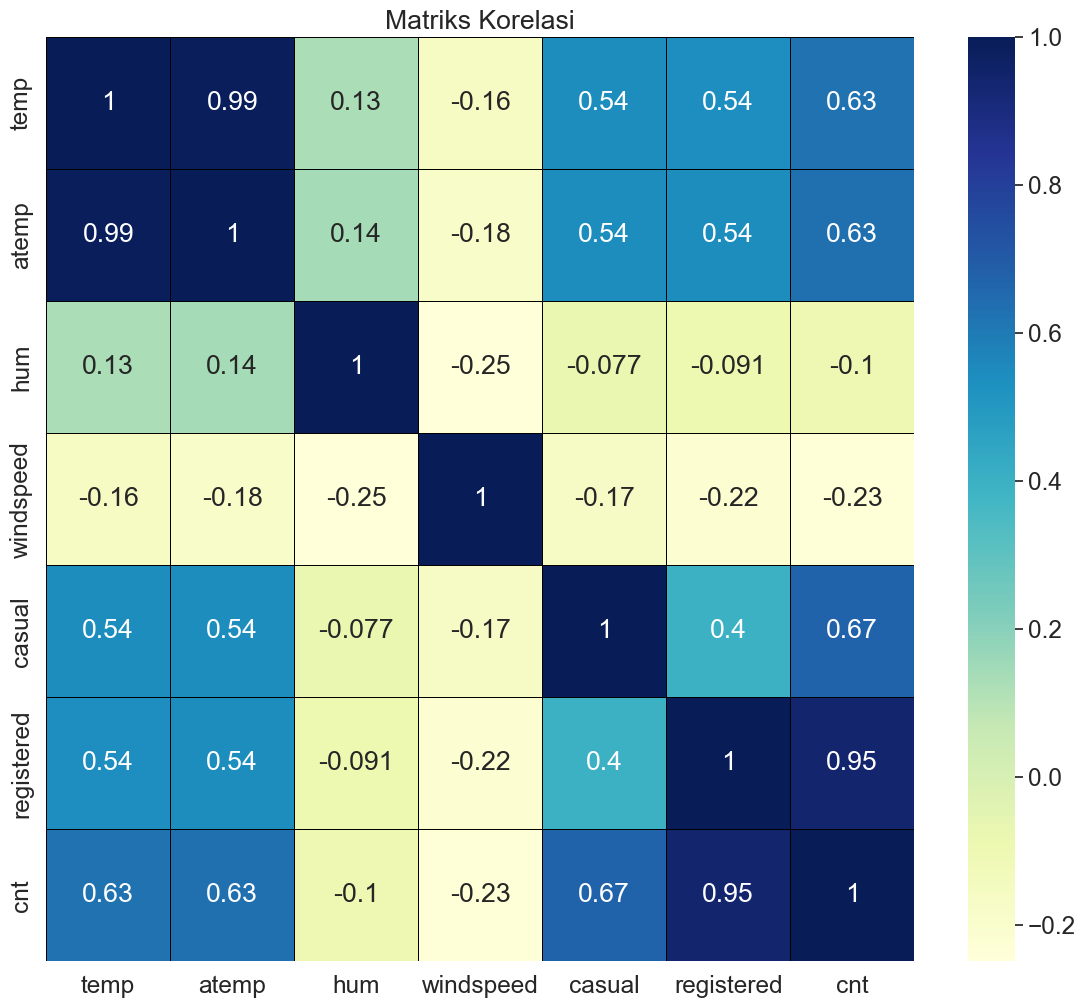

In [222]:
df = day_df.iloc[:, -7:]

# Menghitung matriks korelasi
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black')
plt.title('Matriks Korelasi')
plt.show()

c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Us

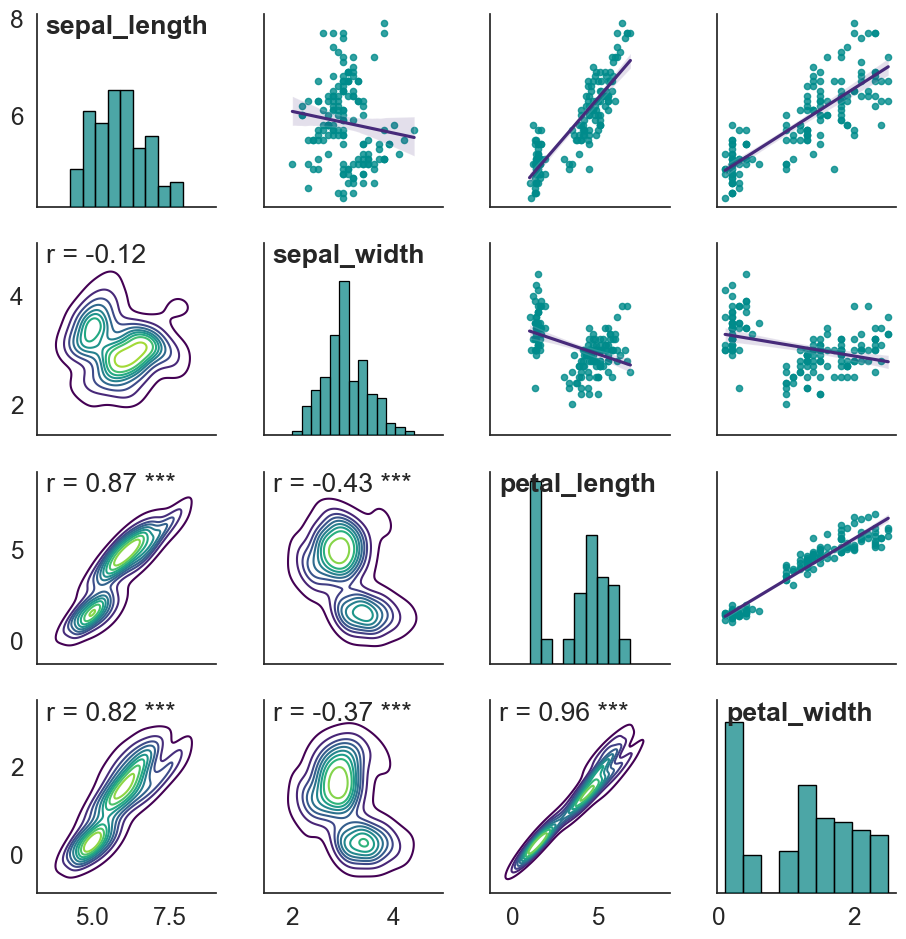

In [242]:
def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')
  
def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  # Upper
  g.map_upper(sns.regplot, scatter_kws={'s': 20, 'color': 'DarkCyan'}, line_kws={'color': '#472a7a'}) 
  # Diag
  g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.7, color='teal', edgecolor='black')
  g.map_diag(annotate_colname)
  # Lower
  g.map_lower(sns.kdeplot, cmap='viridis')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g

cor_matrix(iris)

c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Us

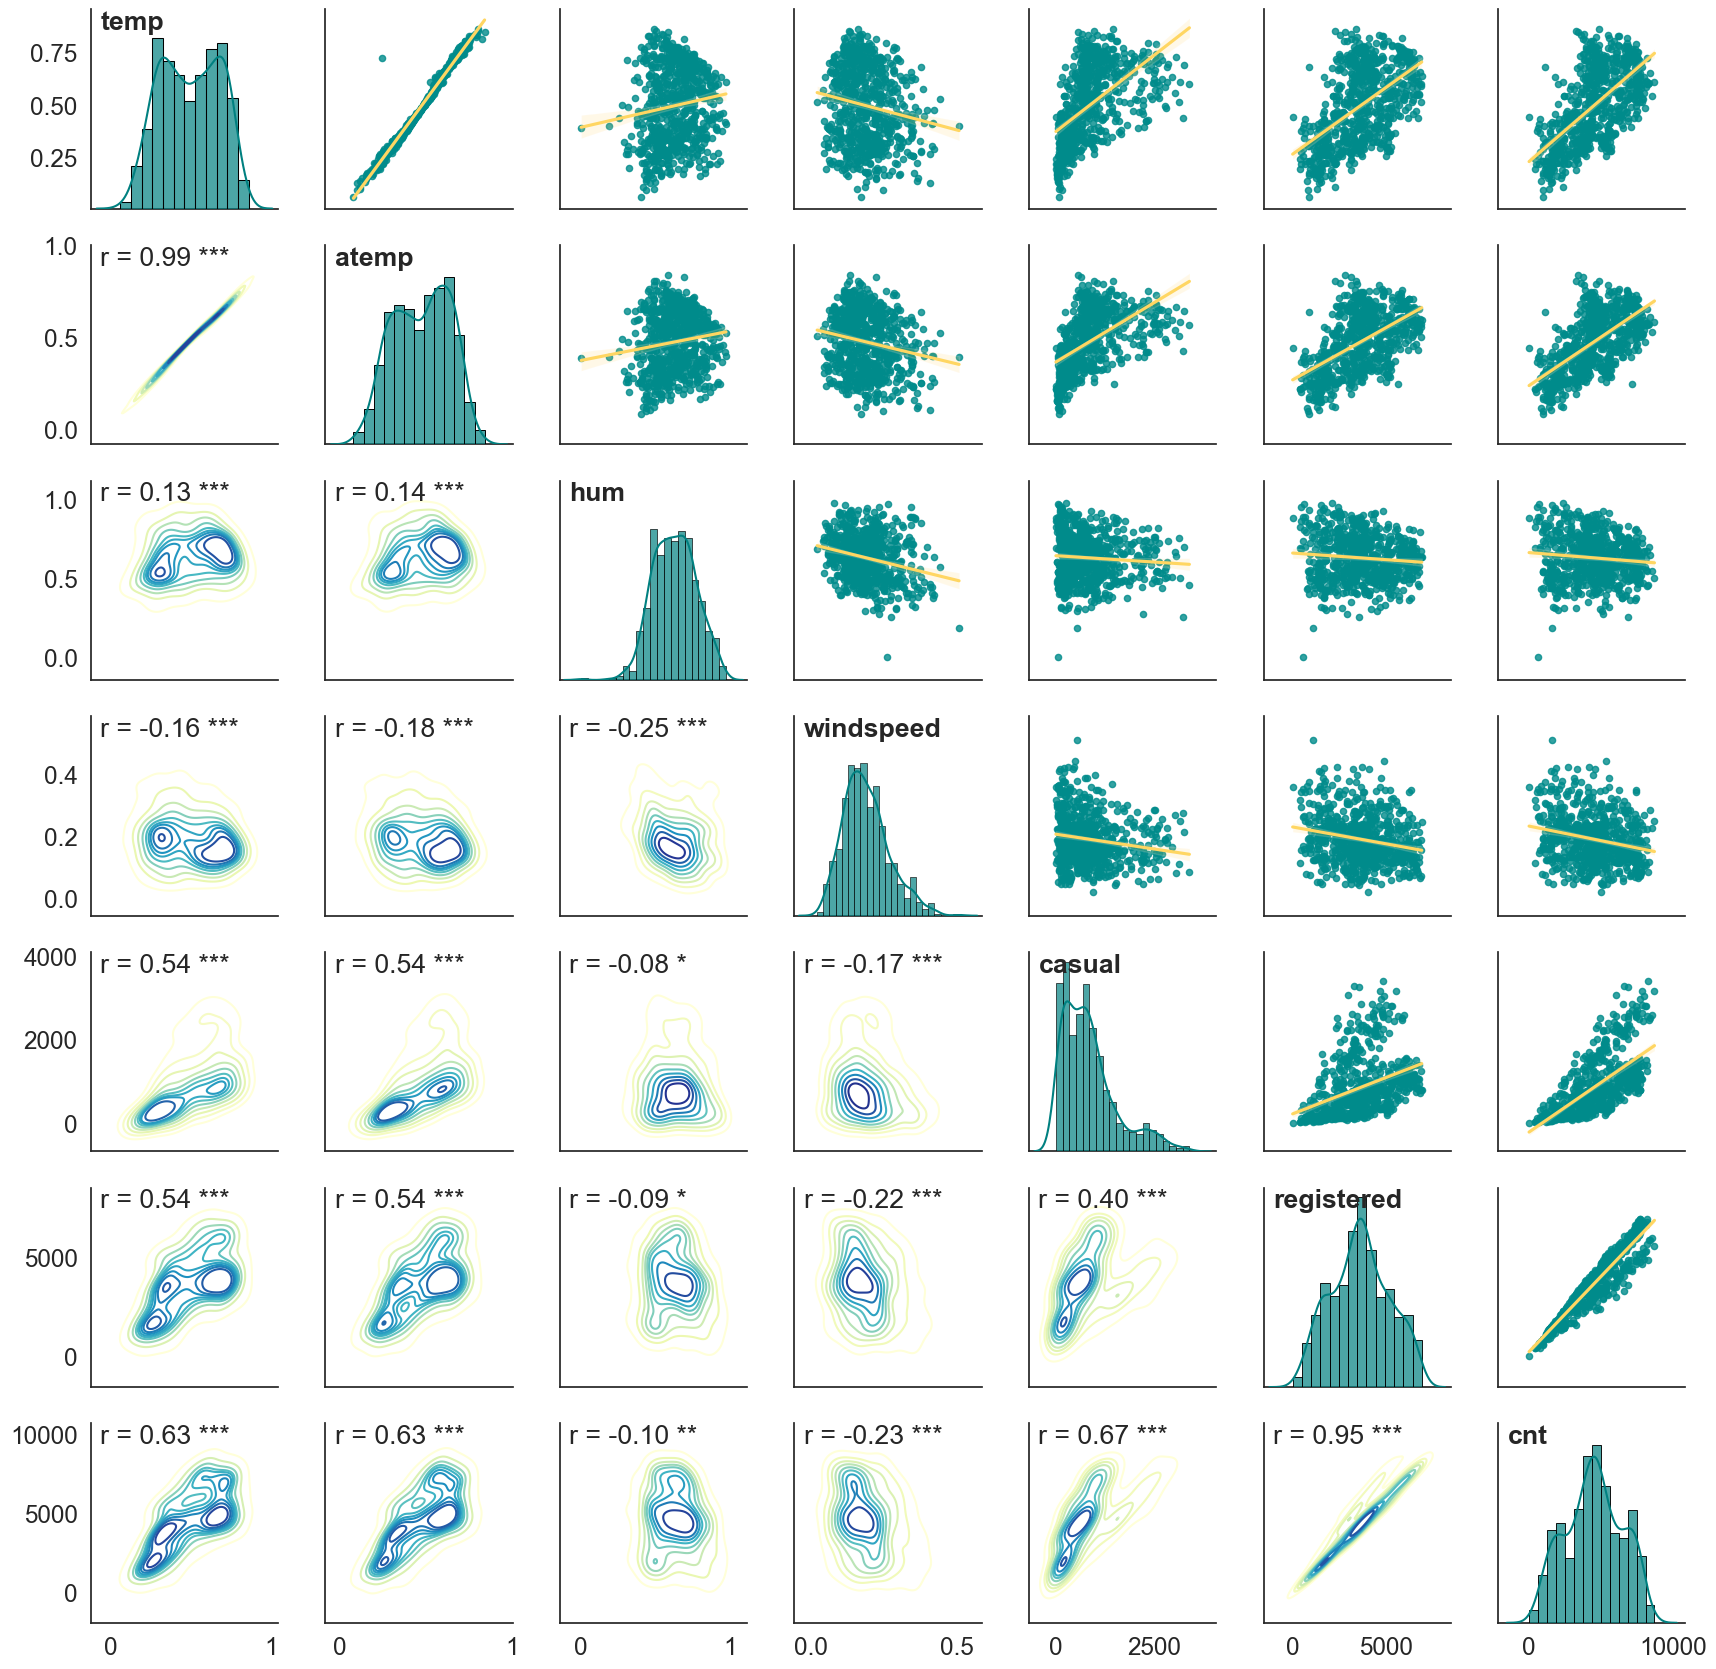

In [237]:
cor_matrix(df)

In [245]:
data.groupby(by="weathersit").agg({
    "dteday": "nunique"
})

,dteday
weathersit,
Berkabut,247
Cerah,463
Salju Ringan,21


In [252]:
data["cnt"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [253]:
df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


### Plot per musim

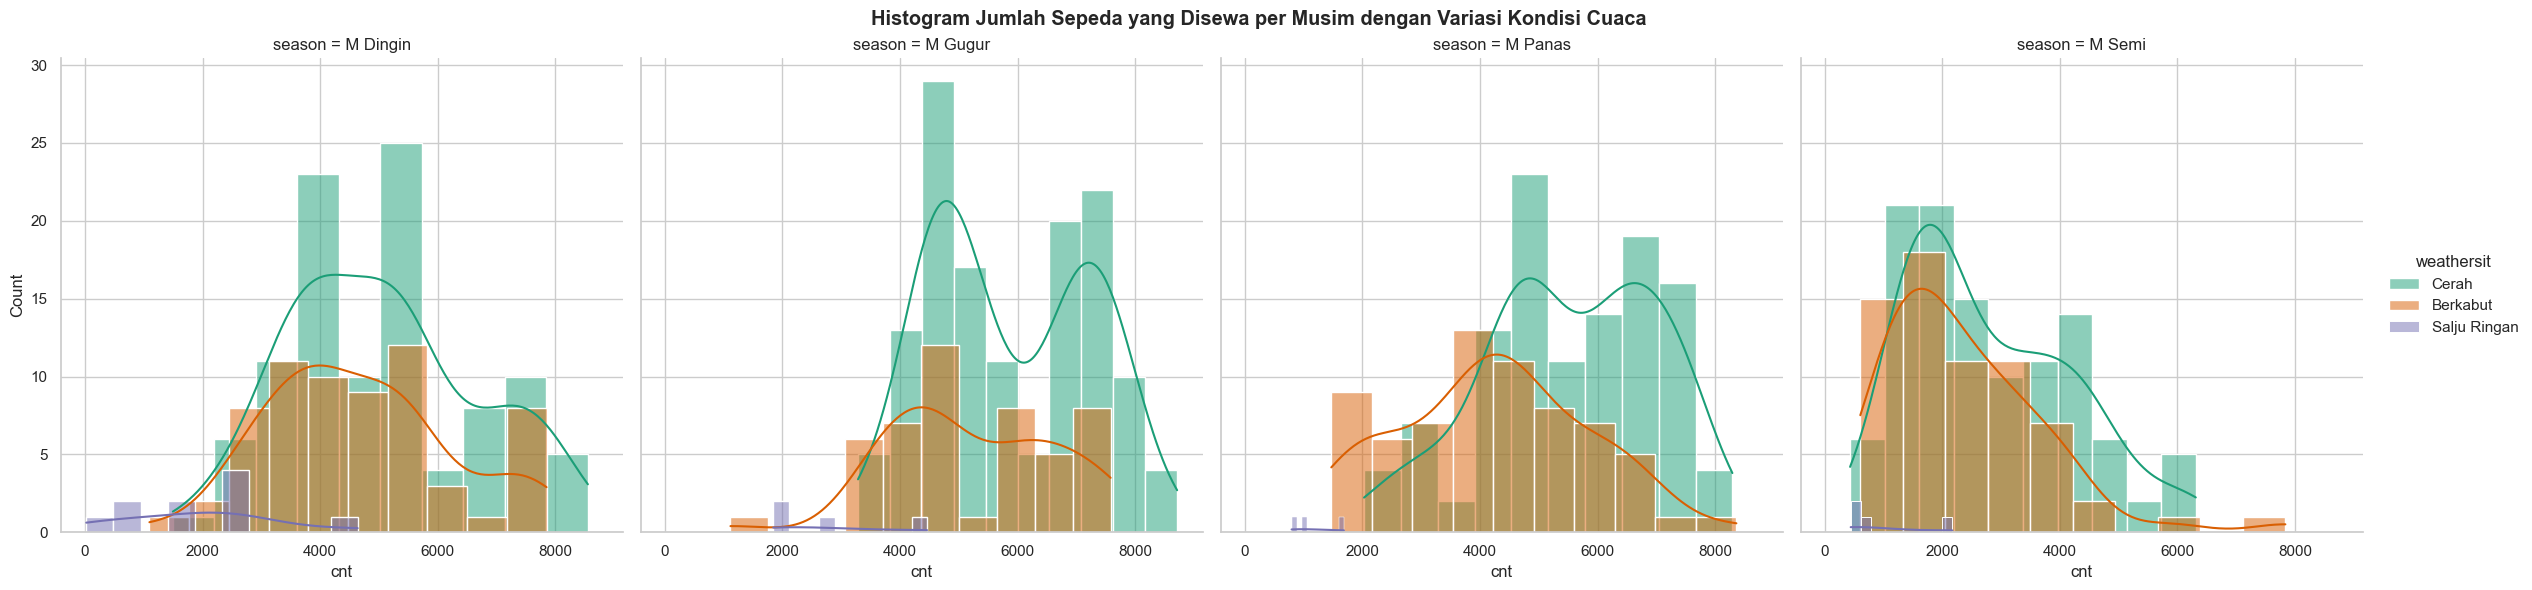

In [369]:
hue_order = dw_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index

# Buat plot menggunakan seaborn dengan palet warna yang lebih kontras
sns.set(style="whitegrid")
g = sns.FacetGrid(dw_df, col="season", hue="weathersit", col_wrap=4, height=6, palette="Dark2", hue_order=hue_order)
g.map(sns.histplot, "cnt", bins=10, kde=True)
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram Jumlah Sepeda yang Disewa per Musim dengan Variasi Kondisi Cuaca', fontweight='bold')
plt.show()

Berdasarkan analisis grafik yang diberikan, beberapa insight penting yang dapat diambil adalah:

1. Cuaca cerah memiliki tren penyewaan sepeda tertinggi di setiap musim, terutama pada musim gugur dan semi. Ini mengindikasikan bahwa kondisi cuaca cerah mendorong minat masyarakat untuk menyewa sepeda. Oleh karena itu, perusahaan penyewaan sepeda perlu mempersiapkan stok sepeda yang memadai pada musim-musim tersebut.

2. Pada musim dingin, cuaca cerah dan berkabut memiliki tren penyewaan sepeda yang cukup tinggi, meskipun lebih rendah daripada musim lainnya. Ini menunjukkan bahwa masyarakat masih memiliki minat untuk menyewa sepeda pada musim dingin, terutama pada cuaca cerah dan berkabut. Perusahaan penyewaan sepeda dapat mempertimbangkan untuk menyediakan layanan khusus atau promosi pada musim dingin untuk meningkatkan penyewaan.

3. Cuaca salju ringan memiliki tren penyewaan sepeda yang sangat rendah di setiap musim. Ini mengindikasikan bahwa masyarakat cenderung tidak menyewa sepeda pada saat cuaca salju ringan. Perusahaan penyewaan sepeda dapat mempertimbangkan untuk mengurangi jumlah sepeda yang tersedia atau bahkan menghentikan operasi sementara pada saat cuaca salju ringan untuk menghemat biaya operasional.

4. Tren penyewaan sepeda pada musim gugur dan panas cenderung lebih tinggi daripada musim lainnya, terutama pada cuaca cerah. Ini menunjukkan bahwa masyarakat lebih tertarik untuk menyewa sepeda pada musim-musim tersebut. Perusahaan penyewaan sepeda perlu mempersiapkan strategi pemasaran dan operasional yang sesuai untuk memenuhi permintaan yang tinggi pada musim-musim tersebut.

5. Secara umum, kondisi cuaca cerah dan musim yang sejuk (semi dan gugur) menjadi faktor pendorong utama dalam tren penyewaan sepeda. Perusahaan penyewaan sepeda perlu memperhatikan pola ini dan mengoptimalkan layanan serta sumber daya mereka sesuai dengan kondisi lingkungan dan musim.

Insight-insight ini dapat membantu perusahaan penyewaan sepeda dalam menganalisis pengaruh kondisi lingkungan dan musim terhadap tren penyewaan sepeda, serta mengembangkan strategi yang tepat untuk meningkatkan efisiensi operasional dan memenuhi permintaan pelanggan secara optimal.

# Clustering

## K-Means

### Jumlah Cluster
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

#### Metode Gap Statistic

In [316]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch
from sklearn.datasets import make_blobs
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

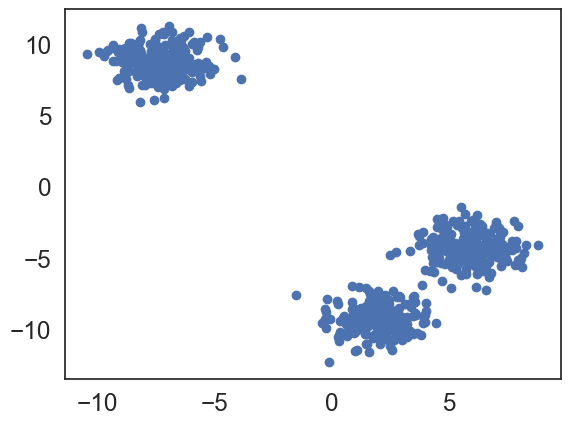

In [317]:
x, y = make_blobs(750, n_features=2, centers=3)

plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [324]:
def optimalK(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    nrefs = 3
    gaps = np.zeros((len(range(1, maxClusters)),))
    results = []
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        results.append({'clusterCount': k, 'gap': gap})
    
    resultsdf = pd.DataFrame(results)
    return (gaps.argmax() + 1, resultsdf)

In [325]:
k, gapdf = optimalK(x, maxClusters=15)
print('Optimal k is: ', k)

Optimal k is:  3


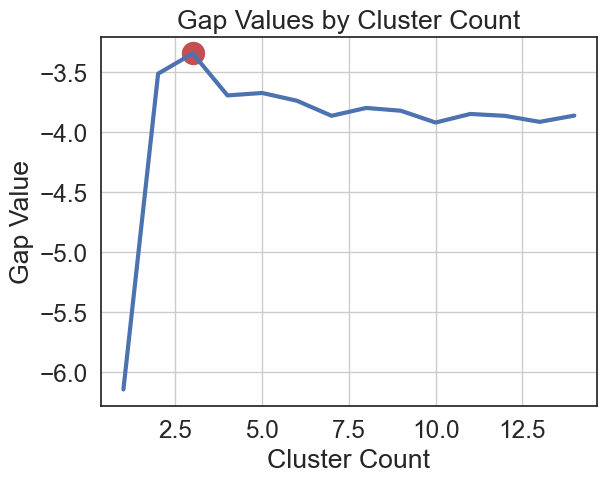

In [326]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [327]:
# Aplikasikan k optimal ke data
km = KMeans(n_clusters=3,init='random', random_state=0)
y_km = km.fit_predict(x,y)

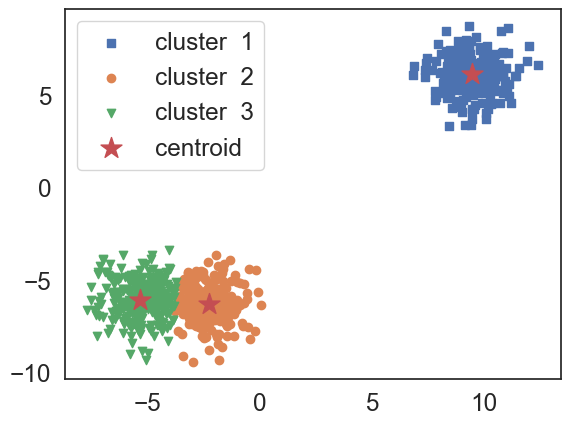

In [328]:
plt.scatter(
    x[y_km==0,0], x[y_km==0,1],
    marker='s',
    label='cluster  1'
)
plt.scatter(
    x[y_km==1,0], x[y_km==1,1],
    marker='o',
    label='cluster  2'
)
plt.scatter(
    x[y_km==2,0], x[y_km==2,1],
    marker='v',
    label='cluster  3'
)
plt.scatter(
    km.cluster_centers_[:,0], km.cluster_centers_[:,1],
    marker='*',s =250,
    label='centroid'
)
plt.legend(scatterpoints=1)

#### Metode Elbow

In [467]:
dw_df.drop(['dteday', 'instant'], axis=1).head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,M Semi,2011,1,-,Minggu,WeekDay,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,M Semi,2011,1,-,Senin,WeekDay,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,M Semi,2011,1,-,Selasa,WeekEnd,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,M Semi,2011,1,-,Rabu,WeekEnd,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,M Semi,2011,1,-,Kamis,WeekEnd,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
#Dummy
dw_dummy = pd.get_dummies(dw_df.drop(['dteday', 'instant'], axis=1), drop_first=True).astype(float)
dw_dummy.head()

,cluster,temp,atemp,hum,windspeed,casual,registered,cnt,season_M Gugur,season_M Panas,...,holiday_Libur,weekday_Kamis,weekday_Minggu,weekday_Rabu,weekday_Sabtu,weekday_Selasa,weekday_Senin,workingday_WeekEnd,weathersit_Cerah,weathersit_Salju Ringan
0,0.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(dw_dummy)

#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.82666213 -0.67994602  1.25017133 -0.38789169 -0.7537338  -1.9254707
  -1.81795256 -0.5884086  -0.57998298  1.74317929 -1.00136893 -0.29080876
  -0.30442673 -0.29902973 -0.30442673 -0.29902973 -0.30442673 -0.30442673
  -0.29902973 -0.30442673 -0.29902973 -0.30442673 -0.171981   -0.40727045
   2.4417012  -0.40727045 -0.40727045 -0.40955052 -0.40955052  1.47122472
  -1.31438653 -0.171981  ]
 [-0.72109471 -0.74065231  0.47911298  0.74960172 -1.04521412 -1.91520896
  -1.91299949 -0.5884086  -0.57998298  1.74317929 -1.00136893 -0.29080876
  -0.30442673 -0.29902973 -0.30442673 -0.29902973 -0.30442673 -0.30442673
  -0.29902973 -0.30442673 -0.29902973 -0.30442673 -0.171981   -0.40727045
  -0.40955052 -0.40727045 -0.40727045 -0.40955052  2.4417012   1.47122472
  -1.31438653 -0.171981  ]
 [-1.63465665 -1.749767   -1.33927398  0.74663186 -1.06124554 -1.5566892
  -1.62992496 -0.5884086  -0.57998298  1.74317929 -1.00136893 -0.29080876
  -0.30442673 -0.29902973 -0.30442673 -0.29902973 -0.3044267

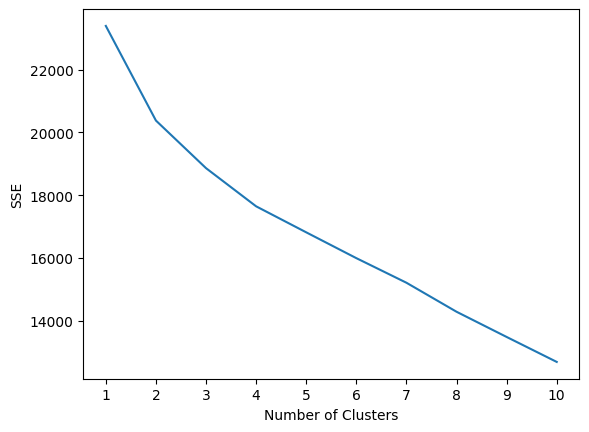

In [113]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Siku yang paling tajam berada di nomor 2. Maka jumlah *cluster* nya adalah 2.

In [114]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#append cluster assingments to original DataFrame
km_data = dw_df
km_data['cluster'] = kmeans.labels_

col = km_data.pop('cluster')
km_data.insert(1, col.name, col)
km_data.head()

,instant,cluster,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,2011-01-01,M Semi,2011,1,-,Minggu,WeekEnd,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,0,2011-01-02,M Semi,2011,1,-,Senin,WeekEnd,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,0,2011-01-03,M Semi,2011,1,-,Selasa,WeekDay,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,0,2011-01-04,M Semi,2011,1,-,Rabu,WeekDay,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,0,2011-01-05,M Semi,2011,1,-,Kamis,WeekDay,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [115]:
dw_dummy

,temp,atemp,hum,windspeed,casual,registered,cnt,season_M Gugur,season_M Panas,season_M Semi,...,holiday_Libur,weekday_Kamis,weekday_Minggu,weekday_Rabu,weekday_Sabtu,weekday_Selasa,weekday_Senin,workingday_WeekEnd,weathersit_Cerah,weathersit_Salju Ringan
0,0.344167,0.363625,0.805833,0.160446,331,654,985,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,0.363478,0.353739,0.696087,0.248539,131,670,801,False,False,True,...,False,False,False,False,False,False,True,True,False,False
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False,True,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114,False,False,True,...,False,False,False,False,False,False,False,False,False,False
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095,False,False,True,...,False,False,False,False,True,False,False,False,False,False
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341,False,False,True,...,False,False,True,False,False,False,False,True,False,False
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796,False,False,True,...,False,False,False,False,False,False,True,True,True,False


In [29]:
km_data["cluster"].value_counts()

cluster
1    403
0    328
Name: count, dtype: int64

Perbedaan banyaknya cluster 1 dan 2.

In [60]:
import plotly.graph_objects as go
import pandas as pd

# Memisahkan kolom numerik dan non-numerik
numeric_cols = km_data.select_dtypes(include=['number']).columns
non_numeric_cols = km_data.select_dtypes(exclude=['number']).columns

# Membuat list kategori numerik
categories = numeric_cols[3:]  # Mengabaikan kolom 'instant', 'cluster', dan 'cnt'

# Membuat figure
fig = go.Figure()

# Menambahkan trace untuk setiap cluster
for cluster in km_data['cluster'].unique():
    cluster_data = km_data[km_data['cluster'] == cluster][categories]
    fig.add_trace(go.Scatterpolar(
        r=cluster_data.mean().values,
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

# Mengatur layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    showlegend=True
)

# Menyimpan plot sebagai file HTML
fig.write_html('radar_chart.html', auto_open=True)

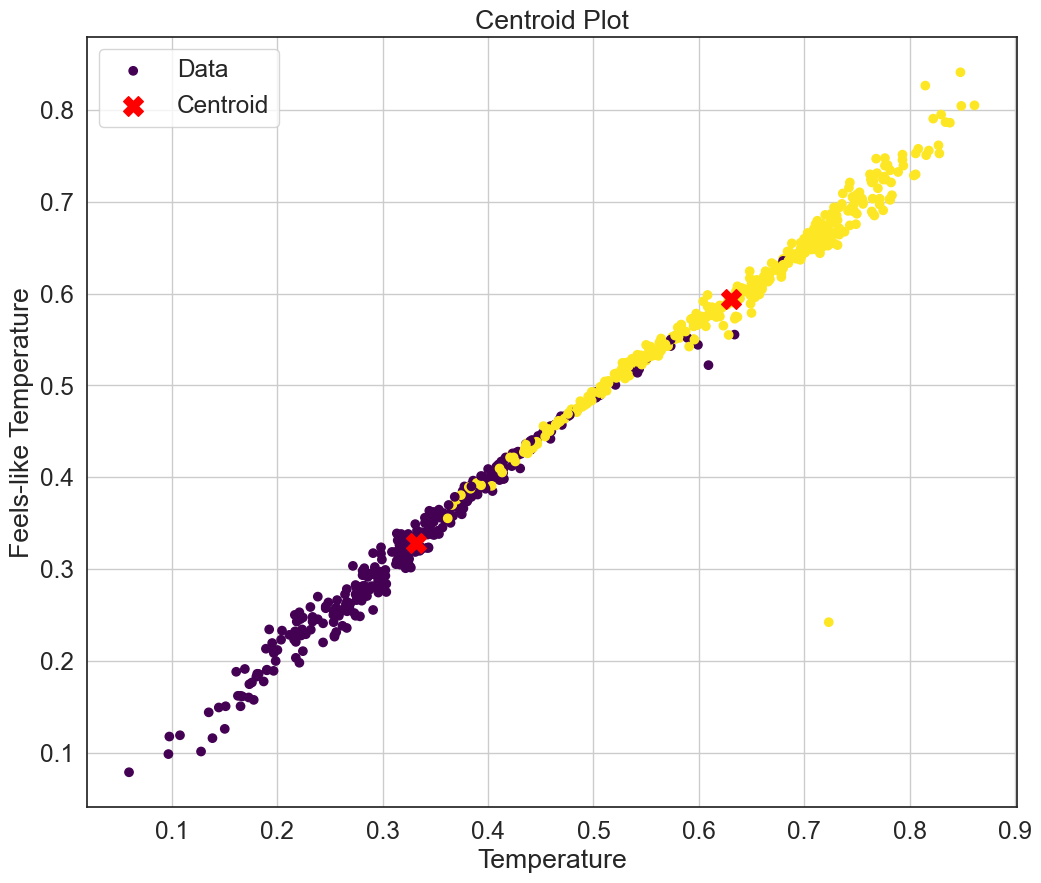

In [333]:
# Hitung centroid untuk setiap klaster
centroid = df.groupby('cluster').mean()

# Plot centroid
plt.figure(figsize=(12, 10))
plt.scatter(df['temp'], df['atemp'], c=df['cluster'], cmap='viridis', label='Data')
plt.scatter(centroid['temp'], centroid['atemp'], marker='X', color='red', s=200, label='Centroid')
plt.xlabel('Temperature')
plt.ylabel('Feels-like Temperature')
plt.title('Centroid Plot')
plt.legend()
plt.grid(True)
plt.show()

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
day_df = pd.read_csv('your_dataset.csv')  # Ganti 'your_dataset.csv' dengan nama file dataset kamu
X = day_df.iloc[:, -7:]  # Memilih kolom yang ingin digunakan untuk clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means clustering with the optimal number of clusters
k = 3  # Ganti dengan jumlah cluster yang telah ditentukan dari elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
day_df['cluster'] = kmeans.labels_

# You can further analyze or visualize the clusters as needed


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

# Regresi

In [116]:
dw_dummy.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_M Gugur,season_M Panas,season_M Semi,...,holiday_Libur,weekday_Kamis,weekday_Minggu,weekday_Rabu,weekday_Sabtu,weekday_Selasa,weekday_Senin,workingday_WeekEnd,weathersit_Cerah,weathersit_Salju Ringan
0,0.344167,0.363625,0.805833,0.160446,331,654,985,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,0.363478,0.353739,0.696087,0.248539,131,670,801,False,False,True,...,False,False,False,False,False,False,True,True,False,False
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [119]:
import statsmodels.api as sm

# Mengonversi tipe data kolom dalam DataFrame menjadi numerik
dw_dummy = dw_dummy.astype(float)

# Memisahkan variabel independen (X) dan variabel dependen (y)
X = dw_dummy.drop(columns=['cnt'])  # Peubah independen, kecuali cnt
y = dw_dummy['cnt']  # Peubah dependen

# Menambahkan kolom konstan untuk model
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X)

# Melatih model menggunakan data
results = model.fit()

# Menampilkan ringkasan hasil regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.155e+31
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:57:21   Log-Likelihood:                 18649.
No. Observations:                 731   AIC:                        -3.724e+04
Df Residuals:                     700   BIC:                        -3.709e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [122]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pengecekan Multikolinieritas
X = dw_dummy.drop(columns=['cnt'])  # Variabel independen
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Seleksi Variabel dengan Metode Subset Selection
# Implementasikan metode forward selection, backward elimination, atau best subset selection di sini.

                    feature         VIF
0                   cluster   13.940936
1                      temp  680.089273
2                     atemp  658.986254
3                       hum   30.966070
4                 windspeed    8.304658
5                    casual   10.841495
6                registered   39.829079
7            season_M Gugur   11.434266
8            season_M Panas   12.813399
9             season_M Semi    7.114154
10                  yr_2012    5.998419
11                   mnth_2    1.986861
12                   mnth_3    2.904517
13                   mnth_4    6.174013
14                   mnth_5    7.699076
15                   mnth_6    8.086235
16                   mnth_7   10.083634
17                   mnth_8    9.511817
18                   mnth_9    7.165616
19                  mnth_10    5.398480
20                  mnth_11    4.359124
21                  mnth_12    2.945175
22            holiday_Libur         inf
23            weekday_Kamis    2.000221


c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



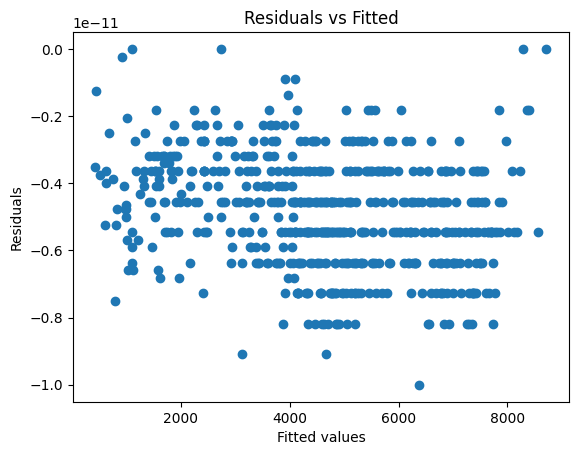

In [123]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi baru
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

# Uji Asumsi Model
# Plot residual vs fitted
residuals = results.resid
fitted = results.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [125]:
import pandas as pd
import statsmodels.api as sm
import itertools
import time
import matplotlib.pyplot as plt

# Fungsi untuk memproses subset
def processSubset(feature_set):
    # Fit model pada feature_set dan hitung RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

# Fungsi untuk memilih model terbaik untuk setiap jumlah prediktor
def getBest(k):
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Buat DataFrame dari hasil
    models = pd.DataFrame(results)
    
    # Pilih model dengan RSS terendah
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

# Tentukan variabel dependen (target) dan independen (fitur)
y = dw_dummy['cnt']
X = dw_dummy.drop(columns=['cnt'])

# Buat DataFrame untuk menyimpan model terbaik untuk setiap jumlah prediktor
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
# Lakukan best subset selection untuk jumlah prediktor dari 1 hingga 7
for i in range(1, 8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

# Tampilkan model terbaik untuk masing-masing jumlah prediktor
print(models_best)

# Tampilkan detail model terbaik untuk jumlah prediktor tertentu
print(models_best.loc[2, "model"].summary())

# Plot RSS, adjusted R^2, AIC, dan BIC untuk semua model
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)
plt.plot(models_best["RSS"])
plt.xlabel('# Prediktor')
plt.ylabel('RSS')

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Prediktor')
plt.ylabel('adjusted R-squared')

aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Prediktor')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Prediktor')
plt.ylabel('BIC')

plt.show()

: 